In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Library for modelling
import statsmodels.api as sm

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

# Library for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Library for Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Library for analyzing the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('Customertravel.csv')

#Checking the first 5 rows of the data set
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [3]:
df.shape

(954, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [6]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[10,10])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

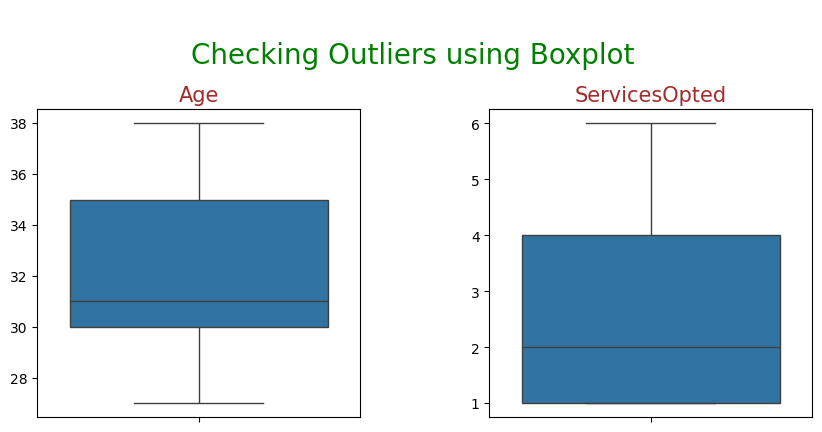

In [7]:
num_cols = ["Age","ServicesOpted"]

# Calling the function
Check_Outliers(df,num_cols)

In [8]:
round(df.Target.value_counts(normalize = True)*100,2)

Target
0    76.52
1    23.48
Name: proportion, dtype: float64

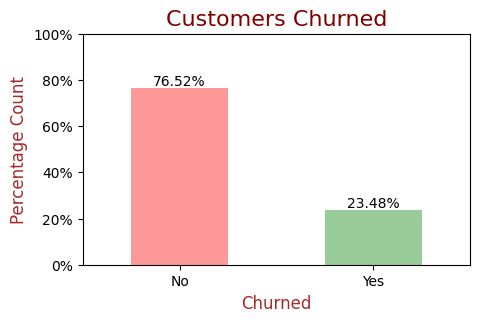

In [9]:
plt.figure(figsize = [5,3])
ax=(100*df["Target"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

#Adding the title
plt.title("Customers Churned",fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})

# Labeling Axes
plt.xlabel('Churned', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

In [10]:
def countplot(i):
    plt.figure(figsize = [10,4])

    ax = sns.countplot(data = df, x = i, hue = 'Target')
    total=len(df[i])
    
    plt.xticks()


    #Adding the title
    plt.title("Countplot of {}".format(i), fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

    plt.show()

In [11]:
df.Age.value_counts()

Age
30    236
37    126
34    107
31    103
28     71
29     70
36     67
27     62
35     52
38     31
33     29
Name: count, dtype: int64

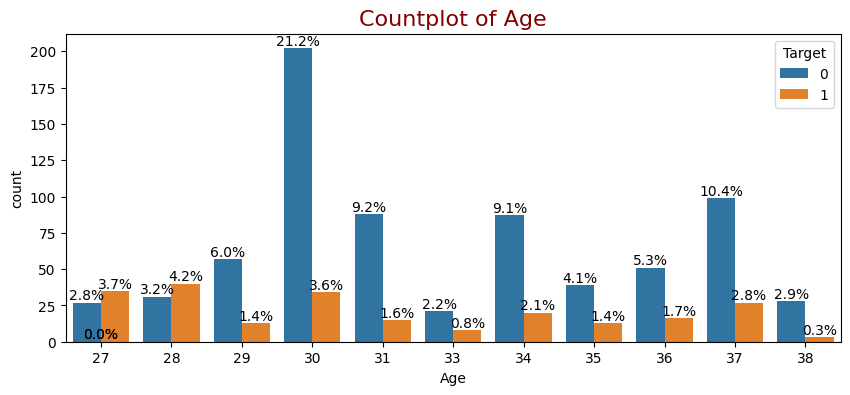

In [12]:
countplot('Age')

In [13]:
df.FrequentFlyer.value_counts()

FrequentFlyer
No           608
Yes          286
No Record     60
Name: count, dtype: int64

In [14]:
df.FrequentFlyer = df.FrequentFlyer.replace('No Record','No')

In [15]:
df.FrequentFlyer.value_counts()

FrequentFlyer
No     668
Yes    286
Name: count, dtype: int64

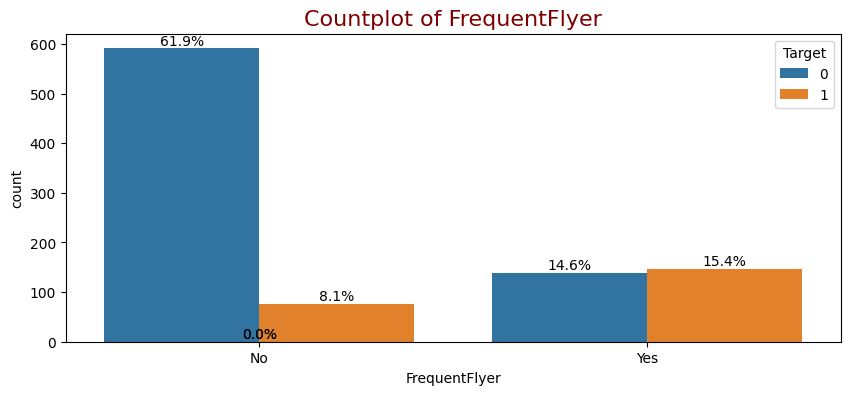

In [16]:
countplot('FrequentFlyer')

In [17]:
df.AnnualIncomeClass.value_counts()

AnnualIncomeClass
Middle Income    409
Low Income       386
High Income      159
Name: count, dtype: int64

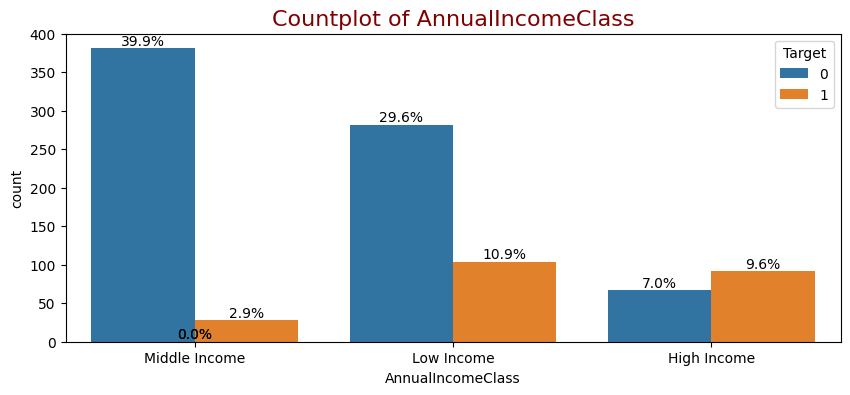

In [18]:
countplot('AnnualIncomeClass')

In [19]:
df.ServicesOpted.value_counts()

ServicesOpted
1    404
2    176
3    124
4    117
5     69
6     64
Name: count, dtype: int64

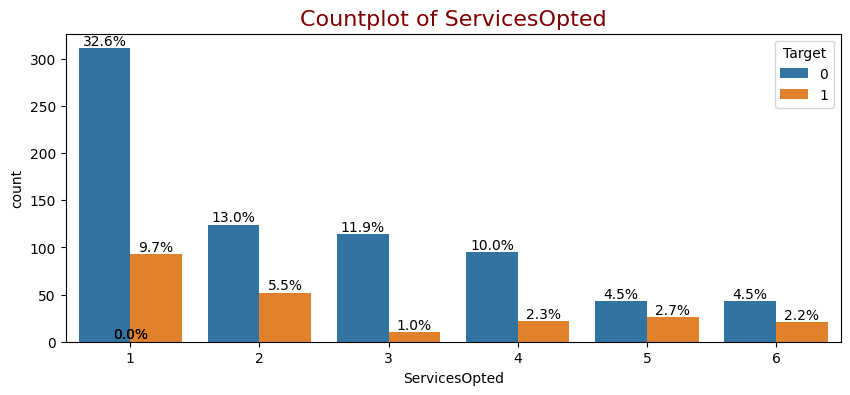

In [20]:
countplot('ServicesOpted')

In [21]:
df.AccountSyncedToSocialMedia.value_counts()

AccountSyncedToSocialMedia
No     594
Yes    360
Name: count, dtype: int64

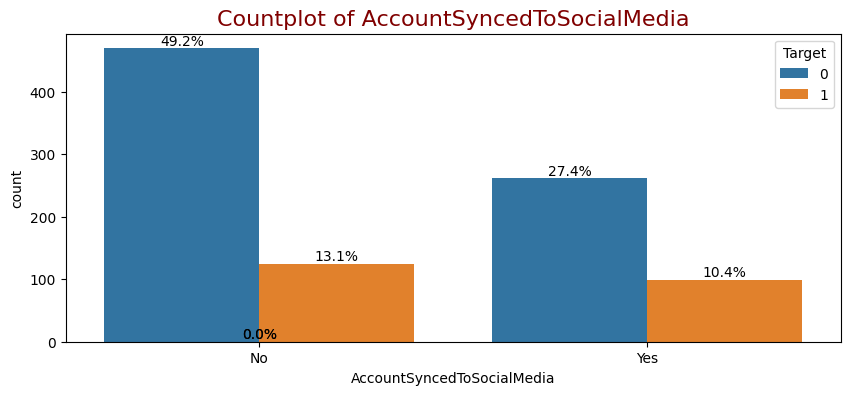

In [22]:
countplot('AccountSyncedToSocialMedia')

In [23]:
df.BookedHotelOrNot.value_counts()

BookedHotelOrNot
No     576
Yes    378
Name: count, dtype: int64

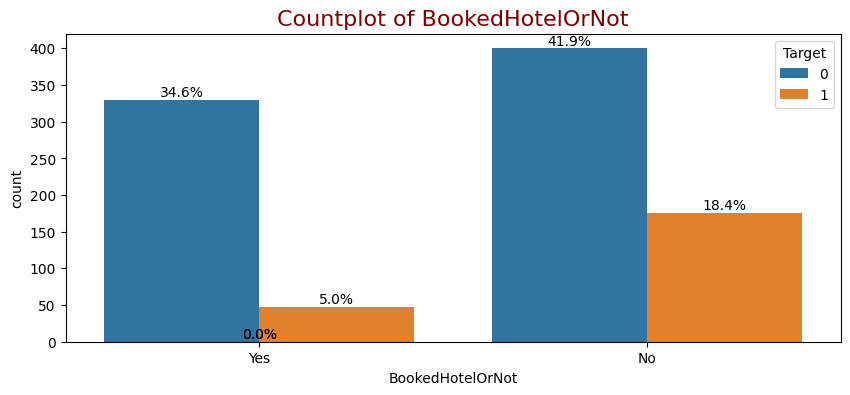

In [24]:
countplot('BookedHotelOrNot')

In [25]:
var = ['FrequentFlyer','AccountSyncedToSocialMedia','BookedHotelOrNot']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

df[var] = df[var].apply(binary_map)

df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,0,1,0
1,34,1,Low Income,5,1,0,1
2,37,0,Middle Income,3,1,0,0
3,30,0,Middle Income,2,0,0,0
4,30,0,Low Income,1,0,0,0


<Figure size 1600x600 with 0 Axes>

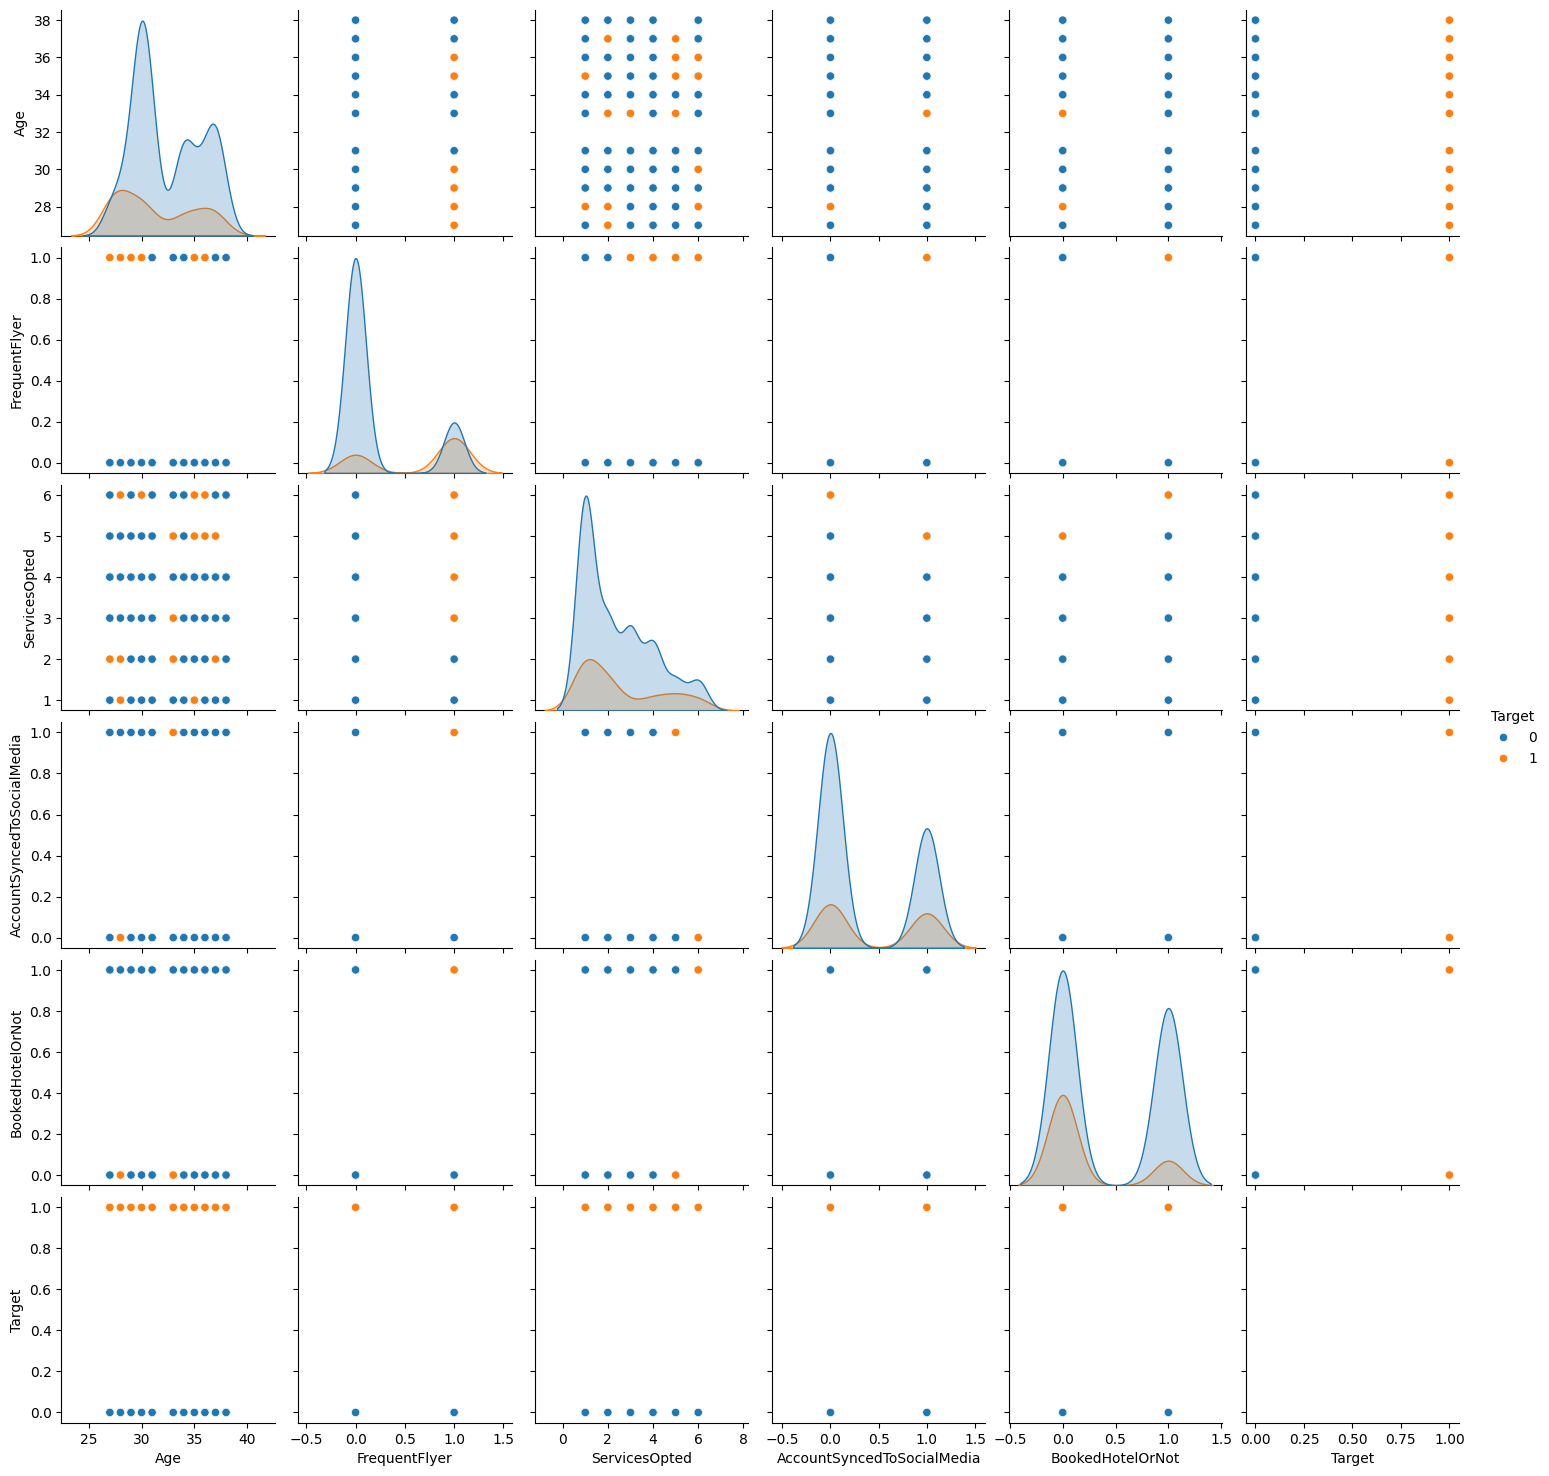

In [26]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 6))
sns.pairplot(data=df,vars=num_cols,hue="Target")                                  
plt.show()

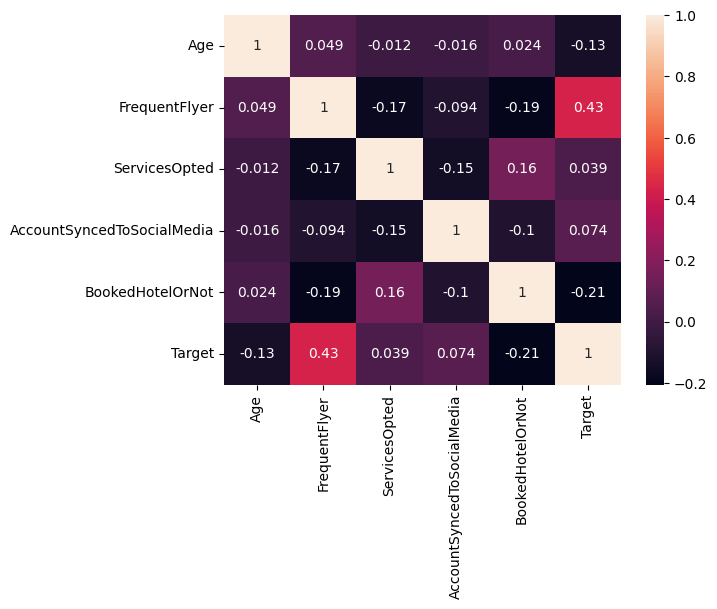

In [27]:
sns.heatmap(data=df[num_cols].corr(),annot=True)
plt.show()

In [28]:
dummy1 = pd.get_dummies(df[['AnnualIncomeClass']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [29]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,0,Middle Income,6,0,1,0,False,True
1,34,1,Low Income,5,1,0,1,True,False
2,37,0,Middle Income,3,1,0,0,False,True
3,30,0,Middle Income,2,0,0,0,False,True
4,30,0,Low Income,1,0,0,0,True,False


In [30]:
df.drop('AnnualIncomeClass',axis = 1, inplace = True)
df.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,0,6,0,1,0,False,True
1,34,1,5,1,0,1,True,False
2,37,0,3,1,0,0,False,True
3,30,0,2,0,0,0,False,True
4,30,0,1,0,0,0,True,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   FrequentFlyer                    954 non-null    int64
 2   ServicesOpted                    954 non-null    int64
 3   AccountSyncedToSocialMedia       954 non-null    int64
 4   BookedHotelOrNot                 954 non-null    int64
 5   Target                           954 non-null    int64
 6   AnnualIncomeClass_Low Income     954 non-null    bool 
 7   AnnualIncomeClass_Middle Income  954 non-null    bool 
dtypes: bool(2), int64(6)
memory usage: 46.7 KB


In [32]:
X = df.drop(['Target'], axis=1)

# Putting Target variables to y
y = df["Target"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(667, 7)
(287, 7)
(667,)
(287,)


In [35]:
scaler=StandardScaler()

#creating a list of numeric variables
num_cols = ['Age','ServicesOpted']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# X-train dataframe after standard scaling
X_train.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
105,-0.651985,1,2.202621,0,1,False,False
953,-0.351865,1,-0.867058,0,0,False,False
299,-0.952106,0,-0.253122,0,0,False,True
69,0.548496,1,0.974750,0,0,False,False
85,-1.552346,1,-0.867058,0,1,True,False


In [36]:
churn = (sum(df['Target'])/len(df['Target'].index))*100
churn

23.48008385744235

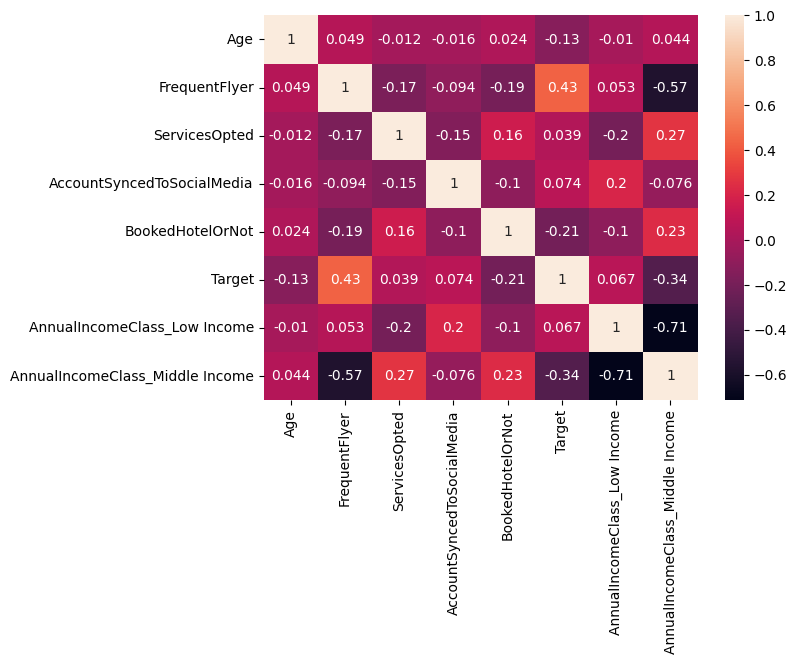

In [37]:
plt.figure(figsize = (7,5))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [38]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [57]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Ensure boolean columns are converted to integers
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})

# Step 2: Align indices of X_train and y_train
X_train, y_train = X_train.align(y_train, join="inner", axis=0)

# Step 3: Add constant for intercept
X_train_sm = sm.add_constant(X_train)

# Step 4: Fit the model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Step 5: View results
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  455
Model:                            GLM   Df Residuals:                      447
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -253.62
Date:                Mon, 09 Dec 2024   Deviance:                       507.25
Time:                        22:08:04   Pearson chi2:                     456.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.006188
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.5214      0.469     -3.243      0.001      -2.441      -0.602
Age                                -0.0134      0.110     -0.122      0.903      -0.229       0.202
FrequentFlyer                       0.0835      0.365      0.228      0.819      -0.633       0.800
ServicesOpted                      -0.0529      0.116     -0.455      0.649      -0.281       0.175
AccountSyncedToSocialMedia          0.2130      0.232      0.917      0.359      -0.243       0.669
BookedHotelOrNot                    0.1610      0.231      0.698      0.485      -0.291       0.613
AnnualIncomeClass_Low Income        0.1740      0.411      0.423      0.672      -0.632       0.980
AnnualIncomeClass_Middle Income     0.3944      0.494      0.798      0.425      -0.574       1.363
===================================================================================================
"""

In [58]:
calculateVIF(X_train)

,Features,VIF
6,AnnualIncomeClass_Middle Income,1.88
5,AnnualIncomeClass_Low Income,1.87
3,AccountSyncedToSocialMedia,1.83
4,BookedHotelOrNot,1.78
1,FrequentFlyer,1.21
2,ServicesOpted,1.15
0,Age,1.01


In [59]:
col = X_train.columns

# Dropping the column
col = col.drop('AnnualIncomeClass_Low Income',1)
col

Index(['Age', 'FrequentFlyer', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

In [60]:
X_train_sm = sm.add_constant(X_train[col])

# Create a fitted model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  455
Model:                            GLM   Df Residuals:                      448
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -253.71
Date:                Mon, 09 Dec 2024   Deviance:                       507.42
Time:                        22:09:15   Pearson chi2:                     456.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.005798
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.3583      0.267     -5.082      0.000      -1.882      -0.834
Age                                -0.0097      0.110     -0.089      0.929      -0.225       0.205
FrequentFlyer                      -0.0102      0.294     -0.035      0.972      -0.587       0.566
ServicesOpted                      -0.0528      0.116     -0.454      0.650      -0.281       0.175
AccountSyncedToSocialMedia          0.2286      0.230      0.995      0.320      -0.222       0.679
BookedHotelOrNot                    0.1676      0.230      0.728      0.467      -0.284       0.619
AnnualIncomeClass_Middle Income     0.2214      0.277      0.798      0.425      -0.322       0.765
===================================================================================================
"""

In [61]:
calculateVIF(X_train[col])

,Features,VIF
5,AnnualIncomeClass_Middle Income,1.63
4,BookedHotelOrNot,1.50
3,AccountSyncedToSocialMedia,1.35
1,FrequentFlyer,1.18
2,ServicesOpted,1.15
0,Age,1.01


In [62]:
y_train_pred = res.predict(X_train_sm)           # giving prob. of getting 1

y_train_pred[:10]

105    0.212373
299    0.247075
69     0.193844
85     0.242322
161    0.208034
420    0.249831
370    0.265258
459    0.242758
494    0.236854
59     0.243295
dtype: float64

In [63]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21237327, 0.24707459, 0.19384371, 0.24232165, 0.20803359,
       0.24983057, 0.26525844, 0.24275789, 0.23685409, 0.24329466])

In [64]:
y_train_pred_final = pd.DataFrame({'Targeted':y_train.values, 'Targeted_Prob':y_train_pred})
y_train_pred_final.head()


,Targeted,Targeted_Prob
0,0,0.212373
1,1,0.247075
2,0,0.193844
3,1,0.242322
4,0,0.208034


In [65]:
y_train_pred_final['Predicted'] = y_train_pred_final.Targeted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Targeted,Targeted_Prob,Predicted
0,0,0.212373,0
1,1,0.247075,0
2,0,0.193844,0
3,1,0.242322,0
4,0,0.208034,0


In [66]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [67]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Targeted'], y_train_pred_final['Predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[342   0]
 [113   0]] 

************************************************** 

True Negative                    :  342
True Positive                    :  0
False Negative                   :  113
False Positve                    :  0
Model Accuracy                   :  0.7516
Model Sensitivity                :  0.0
Model Specificity                :  1.0
Model Precision                  :  nan
Model Recall                     :  0.0
Model True Positive Rate (TPR)   :  0.0
Model False Positive Rate (FPR)  :  0.0


************************************************** 



C:\Users\cyphe\AppData\Local\Temp\ipykernel_5492\1686840086.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)


In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Targeted, y_train_pred_final.Targeted_Prob, drop_intermediate = False )

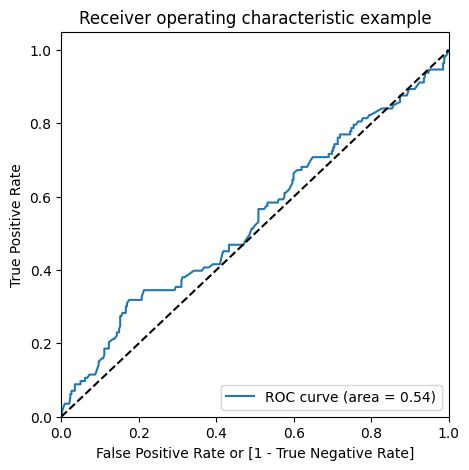

In [70]:
draw_roc(y_train_pred_final.Targeted, y_train_pred_final.Targeted_Prob)

In [71]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Targeted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Targeted,Targeted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.212373,0,1,1,1,0,0,0,0,0,0,0
1,1,0.247075,0,1,1,1,0,0,0,0,0,0,0
2,0,0.193844,0,1,1,0,0,0,0,0,0,0,0
3,1,0.242322,0,1,1,1,0,0,0,0,0,0,0
4,0,0.208034,0,1,1,1,0,0,0,0,0,0,0


In [72]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Targeted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.248352  1.000000  0.000000
0.1   0.1  0.248352  1.000000  0.000000
0.2   0.2  0.270330  0.946903  0.046784
0.3   0.3  0.736264  0.088496  0.950292
0.4   0.4  0.751648  0.000000  1.000000
0.5   0.5  0.751648  0.000000  1.000000
0.6   0.6  0.751648  0.000000  1.000000
0.7   0.7  0.751648  0.000000  1.000000
0.8   0.8  0.751648  0.000000  1.000000
0.9   0.9  0.751648  0.000000  1.000000


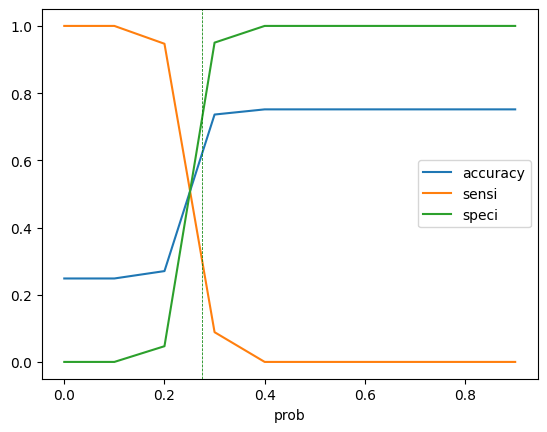

In [73]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.275, color='green',linewidth = 0.55, linestyle='--')
plt.show()

In [74]:
y_train_pred_final['Final_predicted'] = y_train_pred_final['Targeted_Prob'].map( lambda x: 1 if x > 0.275 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Targeted,Targeted_Prob,Final_predicted
0,0,0.212373,0
1,1,0.247075,0
2,0,0.193844,0
3,1,0.242322,0
4,0,0.208034,0


In [75]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Targeted'], y_train_pred_final['Final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[272  70]
 [ 77  36]] 

************************************************** 

True Negative                    :  272
True Positive                    :  36
False Negative                   :  77
False Positve                    :  70
Model Accuracy                   :  0.6769
Model Sensitivity                :  0.3186
Model Specificity                :  0.7953
Model Precision                  :  0.3396
Model Recall                     :  0.3186
Model True Positive Rate (TPR)   :  0.3186
Model False Positive Rate (FPR)  :  0.2047


************************************************** 



In [76]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

#selecting those columns which are selected in the final model

X_test = X_test[col]
X_test.head()

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_Middle Income
697,-1.552346,1,-0.867058,1,0,False
831,-0.952106,0,-0.253122,0,0,True
116,-0.651985,0,0.360814,1,0,True
134,-0.651985,0,0.360814,0,0,False
376,0.548496,0,-0.867058,1,1,False


In [77]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(287, 7)

In [79]:
import pandas as pd
import statsmodels.api as sm

# Ensure X_test is a DataFrame
X_test = pd.DataFrame(X_test)  # Convert to DataFrame if needed

# Ensure boolean columns are converted to integers
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

# Add constant for intercept (if not already added)
X_test_sm = sm.add_constant(X_test, has_constant='add')

# Ensure X_test_sm columns match X_train_sm
X_test_sm = X_test_sm[X_train_sm.columns]

# Handle missing and infinite values
X_test_sm.fillna(0, inplace=True)
X_test_sm.replace([np.inf, -np.inf], 0, inplace=True)

# Predict using the fitted model
y_test_pred = res.predict(X_test_sm)

# Display the first 10 predictions
print(y_test_pred[:10])


697    0.253678
831    0.247075
116    0.284749
134    0.202465
376    0.284621
686    0.281196
625    0.215859
500    0.273667
523    0.244618
124    0.210690
dtype: float64


In [80]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
697,0.253678
831,0.247075
116,0.284749
134,0.202465
376,0.284621


In [81]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Target
697,1
831,0
116,0
134,0
376,0


In [82]:
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Target,0
0,1,0.253678
1,0,0.247075
2,0,0.284749
3,0,0.202465
4,0,0.284621


In [83]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Targeted_Prob', 'Target':'Targeted'})

y_pred_final.head()

,Targeted,Targeted_Prob
0,1,0.253678
1,0,0.247075
2,0,0.284749
3,0,0.202465
4,0,0.284621


In [84]:
y_pred_final['Final_predicted'] = y_pred_final['Targeted_Prob'].map(lambda x: 1 if x > 0.275 else 0)
y_pred_final.head()

,Targeted,Targeted_Prob,Final_predicted
0,1,0.253678,0
1,0,0.247075,0
2,0,0.284749,1
3,0,0.202465,0
4,0,0.284621,1


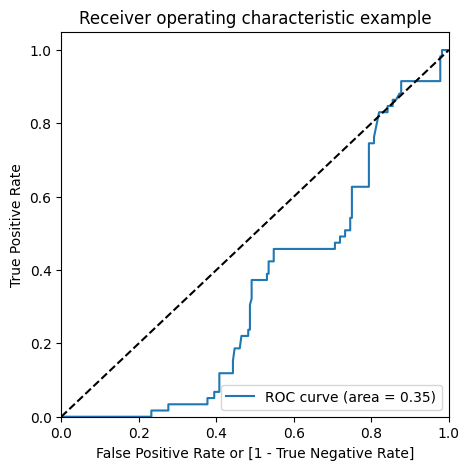

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Targeted"], y_pred_final["Targeted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Targeted"], y_pred_final["Targeted_Prob"])

In [86]:
confusion_matrix = metrics.confusion_matrix(y_pred_final['Targeted'], y_pred_final['Final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[163  65]
 [ 57   2]] 

************************************************** 

True Negative                    :  163
True Positive                    :  2
False Negative                   :  57
False Positve                    :  65
Model Accuracy                   :  0.5749
Model Sensitivity                :  0.0339
Model Specificity                :  0.7149
Model Precision                  :  0.0299
Model Recall                     :  0.0339
Model True Positive Rate (TPR)   :  0.0339
Model False Positive Rate (FPR)  :  0.2851


************************************************** 



In [87]:
parameters=res.params.sort_values(ascending=False)
parameters

AccountSyncedToSocialMedia         0.228552
AnnualIncomeClass_Middle Income    0.221377
BookedHotelOrNot                   0.167648
Age                               -0.009722
FrequentFlyer                     -0.010211
ServicesOpted                     -0.052752
const                             -1.358262
dtype: float64